In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv(r"C:\Users\muralidharan.m\Downloads\data.csv")

In [22]:
data

,x,y,z
0,2,2,train
1,3,2,train
2,4,5,test
3,5,6,test
4,6,8,train
5,7,9,train
6,8,10,test
7,10,15,train


In [23]:
train_X = data[data['z']=='train'][['x']]
train_y = data[data['z']=='train']['y']

test_X = data[data['z']=='test'][['x']]
test_y = data[data['z']=='test']['y']

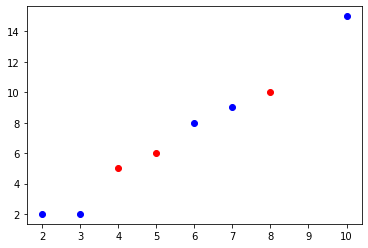

In [24]:
plt.scatter(x = train_X, y = train_y, color="b" )
plt.scatter(x = test_X, y = test_y, color="r" )


In [25]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

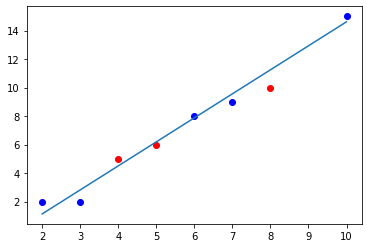

In [26]:
plt.scatter(x = train_X, y = train_y, color="b" )
plt.scatter(x = test_X, y = test_y, color="r" )
plt.plot(train_X, model.predict(train_X))

In [27]:
print("Train MSE : ",mean_squared_error(train_y, model.predict(train_X)))

Train MSE :  0.3796116504854373


In [28]:
print("Test MSE : ", mean_squared_error(test_y, model.predict(test_X)))

Test MSE :  0.6084535143117468


In [29]:
poly = PolynomialFeatures(degree = 10)

In [30]:
X_poly = poly.fit_transform(train_X)

In [31]:
lin2 = LinearRegression()
lin2.fit(X_poly,train_y)

LinearRegression()

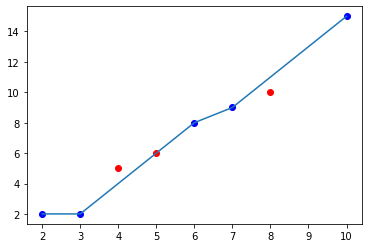

In [32]:
plt.scatter(x = train_X, y = train_y, color="b" )
plt.scatter(x = test_X, y = test_y, color="r" )
plt.plot(train_X, lin2.predict(poly.fit_transform(train_X)))

In [33]:
print("Train MSE : ",mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X))))

Train MSE :  8.584056934174816e-23


In [34]:
print("Test MSE : ",mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X))))

Test MSE :  78.2920665539027


In [35]:
def poly_fit(train_X, train_y, test_X, test_y, degree):
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(train_X)
    lin2 = LinearRegression()
    lin2.fit(X_poly,train_y)
    plt.scatter(x = train_X, y = train_y, color="b" )
    plt.scatter(x = test_X, y = test_y, color="r" )
    plt.plot(train_X, lin2.predict(poly.fit_transform(train_X)))
    print("Train MSE : ",mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X))))
    print("Test MSE : ",mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X))))
    train_mse = mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X)))
    test_mse = mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X)))
    return train_mse,test_mse

Train MSE :  0.2572263721987658
Test MSE :  0.558304398590712


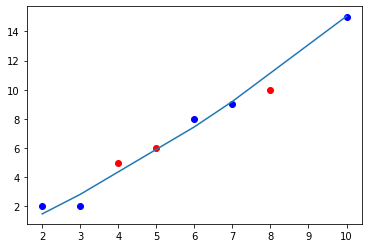

In [36]:
train_mse, test_mse = poly_fit(train_X, train_y, test_X, test_y, 2)

Train MSE :  0.17123341912492568
Test MSE :  1.6825454164787839


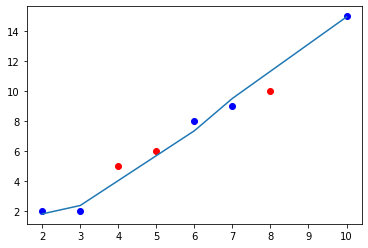

In [37]:
train_mse, test_mse = poly_fit(train_X, train_y, test_X, test_y, 3)

degree :  0
Train MSE :  23.76
Test MSE :  4.706666666666667
degree :  1
Train MSE :  0.37961165048543655
Test MSE :  0.6084535143117503
degree :  2
Train MSE :  0.2572263721987658
Test MSE :  0.558304398590712
degree :  3
Train MSE :  0.17123341912492568
Test MSE :  1.6825454164787839
degree :  4
Train MSE :  6.975200515353406e-23
Test MSE :  0.4364413265334224
degree :  5
Train MSE :  6.630760872504352e-25
Test MSE :  0.9490286489916567
degree :  6
Train MSE :  9.132090497109998e-27
Test MSE :  2.2221454936997227
degree :  7
Train MSE :  1.5913582572649003e-26
Test MSE :  5.434607995953642
degree :  8
Train MSE :  3.5112159448341974e-25
Test MSE :  13.475145705047574
degree :  9
Train MSE :  6.946294584970536e-25
Test MSE :  32.96649797410157


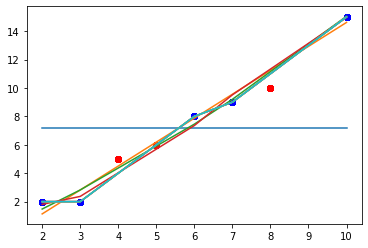

In [38]:
train_mse_list = []
test_mse_list = []
for i in range(0,10):
    print("degree : ",i)
    train_mse, test_mse = poly_fit(train_X, train_y, test_X, test_y, i)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    

In [39]:
degree = list(range(0,10))